In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time


In [4]:
%pwd

'/Users/claudiostaub/galvanize/capstones/Predicting_Hospital_Readmissions'

In [5]:
df = pd.read_csv('data/diabetic_data.csv')

In [6]:
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),?,2,1,2,3,...,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),?,3,1,2,4,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),?,1,1,7,5,...,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),?,2,1,4,13,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),?,3,3,4,12,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


## Basic Observations

Column Names

In [7]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [8]:
df.describe()
## This is not very useful as there are a lot of categorical variables

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


Below is a group by of the 'readmitted' column as well as the 'discharge_disposition_id' column. 

**Readmitted**: 

There are three possible values here:<br>
    -Readmitted in less than 30 days.<br>
    -Readmitted in greater than 30 days.<br>
    -No readmission. <br>
A patient being readmitted in less than 30 days is a key metric being tracked by the Hospital Readmission Reduction Program (HRRP). If Hospital readmissions are found to be above average for any given Hospital, the HRRP will reduce reimbursement to those hospitals. 

In [76]:
df1 = pd.DataFrame(df.groupby(df.readmitted).size())
df1 = df1.reset_index()
df1.columns = ['readmitted', 'frequency']
df1


,readmitted,frequency
0,<30,11357
1,>30,35545
2,NO,54864


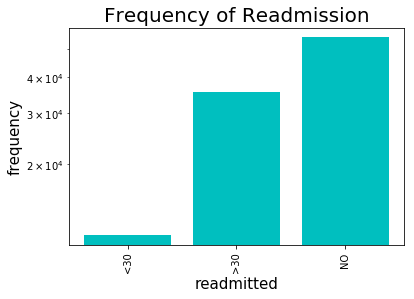

In [84]:
plt.bar(np.array(df1.readmitted),np.array(df1.frequency),color='c')
plt.xlabel('readmitted', fontsize=15)
plt.ylabel('frequency', fontsize=15)
plt.xticks(np.array(df1.readmitted),fontsize=10,rotation=90)
plt.title('Frequency of Readmission', fontsize=20)
plt.yscale('log')
plt.show()


**Discharge Disposition ID**<br>
There were 28 different discharge disposition IDs. Some of these can already be eliminated from consideration. 


In [52]:
discharge_dispo = pd.DataFrame(df.groupby(df.discharge_disposition_id).size())
discharge_dispo = discharge_dispo.reset_index()
discharge_dispo.columns = ['dispoID','frequency']
discharge_dispo





,dispoID,frequency
0,1,60234
1,2,2128
2,3,13954
3,4,815
4,5,1184
5,6,12902
6,7,623
7,8,108
8,9,21
9,10,6


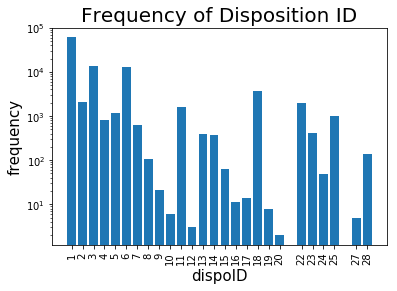

In [74]:
plt.bar(np.array(discharge_dispo.dispoID),np.array(discharge_dispo.frequency))
plt.xlabel('dispoID', fontsize=15)
plt.ylabel('frequency',fontsize=15)
plt.xticks(np.array(discharge_dispo.dispoID),fontsize=10,rotation=90)
plt.title('Frequency of Disposition ID',fontsize=20)
plt.yscale('log')
plt.show()
# plt.tight_layout
# from numpy.random import normal 
# x= normal(size=1000)
# x
# plt.hist(x)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

In [13]:
dfid = pd.read_csv('data/IDs_mapping.csv')
# dfid

In [14]:
df_admission_type_id = dfid[0:8]
df_admission_type_id

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped


In [15]:
df_dc_dispo_id = dfid[9:40]
df_dc_dispo_id.columns=['discharge_disposition_id', 'description']
df_dc_dispo_id = df_dc_dispo_id.drop(index=9)
df_dc_dispo_id
# df_dc_dispo_id.reset_index(drop=True)



,discharge_disposition_id,description
10,1,Discharged to home
11,2,Discharged/transferred to another short term h...
12,3,Discharged/transferred to SNF
13,4,Discharged/transferred to ICF
14,5,Discharged/transferred to another type of inpa...
15,6,Discharged/transferred to home with home healt...
16,7,Left AMA
17,8,Discharged/transferred to home under care of H...
18,9,Admitted as an inpatient to this hospital
19,10,Neonate discharged to another hospital for neo...


In [75]:
df_admission_source_id = dfid[41:]
df_admission_source_id.columns=['admission_source_id','description']
df_admission_source_id.group_by(admission_source_id).count()
df_admission_source_id
# df_admission_source_id.drop(index=41)

AttributeError: 'DataFrame' object has no attribute 'group_by'

In [17]:
import pyspark as ps
spark = (ps.sql.SparkSession
         .builder
         .master('local[4]')
         .appName('capstone')
         .getOrCreate()
        )
sc = spark.sparkContext

In [18]:
spark

In [19]:
rdd = sc.textFile('data/diabetic_data.csv')


In [20]:
rdd.take(10)

['encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted',
 '2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,?,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,?,?,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO',
 '149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,?,?,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No